In [19]:
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [20]:
data_path = './Pipette_Calibration/'

In [21]:
p1000_data = data_path + '19121401_Pipette_Calibration - 1000.csv'
p200_data = data_path + '19121401_Pipette_Calibration - 200.csv'
p20_data = data_path + '19121401_Pipette_Calibration - 20.csv'
p20A_data = data_path + '19121401_Pipette_Calibration - 20_A.csv'

In [90]:
p1000df = pd.read_csv(p1000_data, skiprows=2)
p200df = pd.read_csv(p200_data, skiprows=2)
p20df = pd.read_csv(p20_data, skiprows=2)
p20Adf = pd.read_csv(p20A_data, skiprows=2)

In [91]:
p1000df.head()

,Plunger_pos,Plunger,mass_mL,mass
0,0,0,0.9860,986.0
1,0,0,1.0014,1001.4
2,0,0,0.9932,993.2
3,0,0,0.9927,992.7
4,21,-21,1.6332,1633.2


In [92]:
p20Adf.head()

,Plunger,Before,After,mass
0,-6,0.9868,0.9910,4.2
1,-6,0.9788,0.9834,4.6
2,-6,0.9850,0.9904,5.4
3,-21,0.9787,0.9927,14.0
4,-11,0.9798,0.9868,7.0


In [93]:
p1000grouped = p1000df.groupby('Plunger').mean()
p200grouped = p200df.groupby('Plunger').mean()
p20grouped = p20df.groupby('Plunger').mean()
p20Agrouped = p20Adf.groupby('Plunger').mean()

In [94]:
p1000grouped['std'] = p1000df.groupby('Plunger').std()['mass']
p200grouped['std'] = p200df.groupby('Plunger').std()['mass']
p20grouped['std'] = p20df.groupby('Plunger').std()['mass']
p20Agrouped['std'] = p20Adf.groupby('Plunger').std()['mass']

In [95]:
p20Agrouped

,Before,After,mass,std
Plunger,,,,
-26,0.986650,1.003350,16.700,0.489898
-21,0.988175,1.002075,13.900,0.503322
-16,0.985550,0.997350,11.800,0.909212
-11,0.984975,0.993000,8.025,1.515201
-6,0.984150,0.988900,4.750,0.500000
-1,0.989100,0.990750,1.650,0.754983
0,0.986800,0.987900,1.100,NaN


In [96]:
p20Agrouped = p20Agrouped.rename(columns={'Mass': 'mass'})

In [97]:
p20grouped = p20Agrouped.copy()

In [98]:
p1000grouped['mass'] = p1000grouped.mass - p1000grouped.mass.loc[0]
p200grouped['mass'] = p200grouped.mass - p200grouped.mass.loc[0]
p20grouped['mass'] = p20grouped.mass - p20grouped.mass.loc[0]

In [99]:
p1000grouped = p1000grouped.reset_index()
p200grouped = p200grouped.reset_index()
p20grouped = p20grouped.reset_index()

In [100]:
p1000grouped.reset_index()

,index,Plunger,Plunger_pos,mass_mL,mass,std
0,0,-26,26,1.789350,796.025,2.577466
1,1,-21,21,1.634450,641.125,5.535642
2,2,-16,16,1.487825,494.500,8.716412
3,3,-11,11,1.327825,334.500,10.510748
4,4,-6,6,1.179800,186.475,4.167333
5,5,-1,1,1.024525,31.200,4.170831
6,6,0,0,0.993325,0.000,6.305223


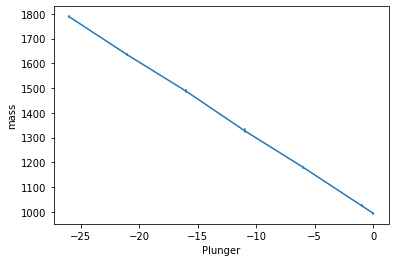

In [101]:
ax = sns.lineplot(x="Plunger", y="mass", err_style="bars", ci=68, data=p1000df)

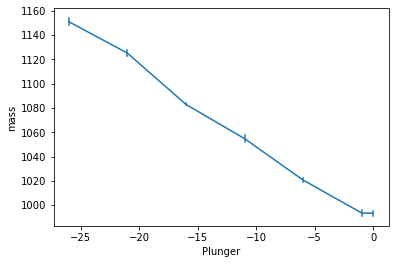

In [102]:
ax = sns.lineplot(x="Plunger", y="mass", err_style="bars", ci=68, data=p200df)

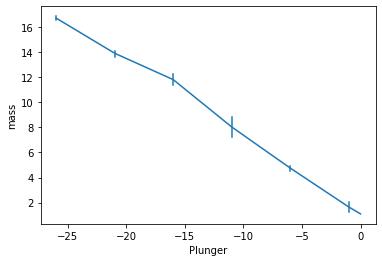

In [103]:
ax = sns.lineplot(x="Plunger", y="mass", err_style="bars", ci=68, data=p20Adf)

In [104]:
p1000grouped.head()

,Plunger,Plunger_pos,mass_mL,mass,std
0,-26,26,1.789350,796.025,2.577466
1,-21,21,1.634450,641.125,5.535642
2,-16,16,1.487825,494.500,8.716412
3,-11,11,1.327825,334.500,10.510748
4,-6,6,1.179800,186.475,4.167333


In [105]:
p20grouped

,Plunger,Before,After,mass,std
0,-26,0.986650,1.003350,15.600,0.489898
1,-21,0.988175,1.002075,12.800,0.503322
2,-16,0.985550,0.997350,10.700,0.909212
3,-11,0.984975,0.993000,6.925,1.515201
4,-6,0.984150,0.988900,3.650,0.500000
5,-1,0.989100,0.990750,0.550,0.754983
6,0,0.986800,0.987900,0.000,NaN


In [106]:
#p20grouped = p20grouped[p20grouped.Plunger >= 11]
#p200grouped = p200grouped[p200grouped.Plunger <= -1]

In [107]:
p200grouped

,Plunger,Plunger_pos,mass_mL,mass,std
0,-26,26,1.151050,157.725,5.700000
1,-21,21,1.125200,131.875,5.799425
2,-16,16,1.082975,89.650,1.755705
3,-11,11,1.054825,61.500,6.564234
4,-6,6,1.020725,27.400,4.174825
5,-1,1,0.993625,0.300,4.761915
6,0,0,0.993325,0.000,6.305223


In [108]:
def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

In [109]:
popt_1000, pcov_1000 = curve_fit(f, p1000grouped.mass, p1000grouped.Plunger) # your data x, y to fit
popt_200, pcov_200 = curve_fit(f, p200grouped.mass, p200grouped.Plunger) # your data x, y to fit
popt_20, pcov_20 = curve_fit(f, p20grouped.mass, p20grouped.Plunger) # your data x, y to fit

In [110]:
popt_1000

array([-0.03269068,  0.0282737 ])

In [111]:
k_1000 = popt_1000[0]
b_1000 = popt_1000[1]
k_200 = popt_200[0]
b_200 = popt_200[1]
k_20 = popt_20[0]
b_20 = popt_20[1]

In [112]:
k_1000, b_1000

(-0.032690675081371225, 0.02827370409092112)

In [121]:
k_200, b_200

(-0.15859245180518214, -0.958195131933648)

In [122]:
k_20, b_20

(-1.6287116213729622, 0.11457730909173938)

In [113]:
p1000grouped['fit'] = p1000grouped.mass * k_1000 + b_1000

In [114]:
p1000grouped

,Plunger,Plunger_pos,mass_mL,mass,std,fit
0,-26,26,1.789350,796.025,2.577466,-25.994321
1,-21,21,1.634450,641.125,5.535642,-20.930535
2,-16,16,1.487825,494.500,8.716412,-16.137265
3,-11,11,1.327825,334.500,10.510748,-10.906757
4,-6,6,1.179800,186.475,4.167333,-6.067720
5,-1,1,1.024525,31.200,4.170831,-0.991675
6,0,0,0.993325,0.000,6.305223,0.028274


In [115]:
p20grouped

,Plunger,Before,After,mass,std
0,-26,0.986650,1.003350,15.600,0.489898
1,-21,0.988175,1.002075,12.800,0.503322
2,-16,0.985550,0.997350,10.700,0.909212
3,-11,0.984975,0.993000,6.925,1.515201
4,-6,0.984150,0.988900,3.650,0.500000
5,-1,0.989100,0.990750,0.550,0.754983
6,0,0.986800,0.987900,0.000,NaN


In [116]:
0 * k_200 + b_200

-0.958195131933648

In [117]:
0.02 * k_20 + b_20

0.08200307666428014

In [118]:
0.004 * k_20 + b_20

0.10806246260624754

In [119]:
0.001 * k_20 + b_20

0.11294859747036642

In [120]:
1 * k_1000 + b_1000

-0.004416970990450103